In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# dataset 

train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [7]:
## hub layer
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [21]:
# model

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                672       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 401,237
Trainable params: 401,237
Non-trainable params: 0
_________________________________________________________________


In [26]:
## compile the model
model.compile(optimizer='ada',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
## evaluating the model 
results = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 1s - loss: 0.8013 - accuracy: 0.5260


In [18]:
for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

loss: 1.001
accuracy: 0.499


In [27]:
## training

history = model.fit(train_data.batch(512), validation_data = test_data.batch(512),epochs=10, verbose=1)

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 1.2447 - val_accuracy: 0.8268
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 1.2223 - val_accuracy: 0.8362
Epoch 3/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 1.3478 - val_accuracy: 0.8330
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.4095 - val_accuracy: 0.8337
Epoch 5/20
30/30 [==============================] - 1s 51ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.4532 - val_accuracy: 0.8350
Epoch 6/20
30/30 [==============================] - 1s 50ms/step - loss: 6.2435e-04 - accuracy: 0.9999 - val_loss: 1.5483 - val_accuracy: 0.8338
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 5.2672e-04 - accuracy: 0.9999 - val_loss: 1.5961 - val_accuracy: 0.8342
Epoch

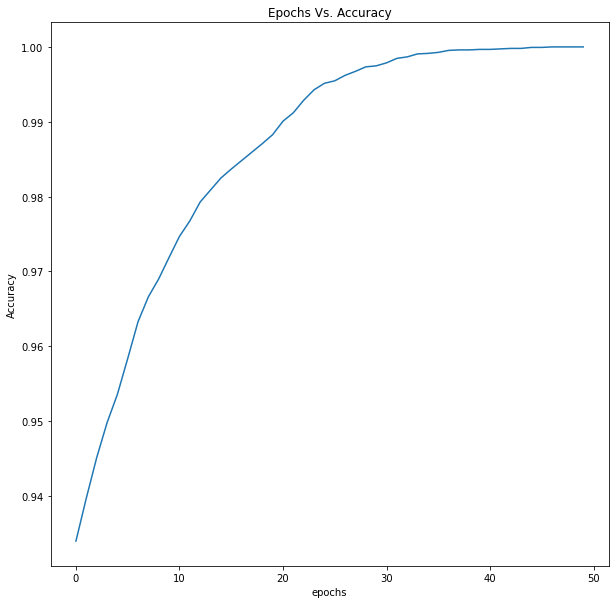

In [15]:
## accuracy vs epoch graph

plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Epochs Vs. Accuracy');

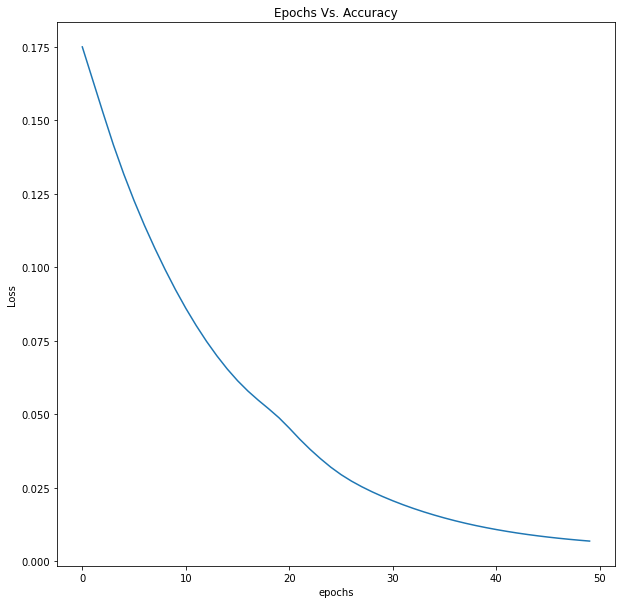

In [16]:
## Loss vs Epoch graph

plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs. Accuracy');